In [8]:
%matplotlib inline

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc

import os
import random
import pickle

In [9]:
imageFolder = "-images"

image_dim = 1 # black and white
image_size = 32

data = []

fileNames = os.listdir(imageFolder)

print "number of images:", len(fileNames)

typesList = list(set([fileName.split("_")[0] for fileName in fileNames]))
typesDict = {}
for i, t in enumerate(typesList):
    typesDict[t] = i
    
for fileName in fileNames:

    img = misc.imread("/".join([imageFolder, fileName]))

    if image_dim == 1 and len(img.shape) > 2: 
        img = img[:,:,0] # convert to black and white

    if img.shape[0] != image_size or img.shape[1] != image_size:
        img = misc.imresize(img, (image_size, image_size), interp='nearest')

    img = (img - img.mean()) / img.std() / 4 + 0.5

    data.append([img, typesDict[fileName.split("_")[0]]])

print "Load data complete"

number of images: 12450
Load data complete


In [10]:
random.shuffle(data)

In [11]:
X = np.ndarray((len(data), image_size, image_size), dtype=np.float32)
y = np.ndarray((len(data), 1), dtype=np.int32)

for i, d in enumerate(data):
    X[i] = d[0]
    y[i] = d[1]

image dimensions: (32, 32)
target category: cube


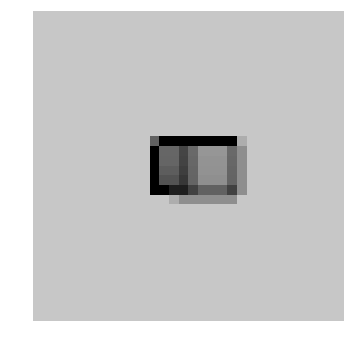

In [12]:
img_index = 2

img = X[img_index]
print "image dimensions:", img.shape
print "target category:", (typesList[y[img_index][0]])

imshow(img, cmap = plt.get_cmap('gray'), vmin = -1, vmax = 1,  interpolation='nearest')
plt.axis('off')
plt.show()

In [13]:
pickle_file = '-data.pickle'

try:
    f = open(pickle_file, 'wb')
    save = {
        'X': X,
        'y': y,
        'typesList': typesList,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print 'Unable to save data to', pickle_file, ':', e
    raise
    
statinfo = os.stat(pickle_file)
print 'Saved data to', pickle_file
print 'Compressed pickle size:', statinfo.st_size

Saved data to data.pickle
Compressed pickle size: 51045303
